Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


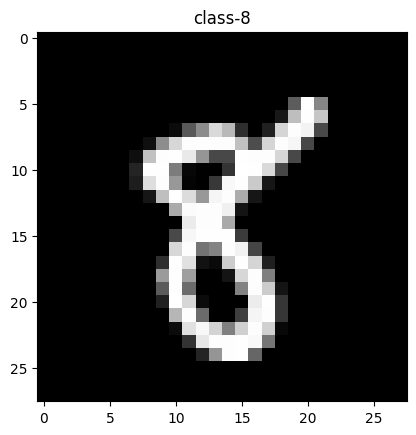

Train image 45679-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  92 255 134   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   24 190 254 198   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  11  89 140 217 185  46   0  32
  213 253 243  73   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/shubham/shubham ml/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



In [2]:
sampled_indices = []
for label in range(10):
    class_indices = np.where(train_labels == label)[0]
    sampled_indices.extend(np.random.choice(class_indices, size=600, replace=False))
sampled_indices = np.array(sampled_indices)
# Select sampled data and labels
train_images_sampled = train_images[sampled_indices]
train_labels_sampled = train_labels[sampled_indices]

print('Sampled Train data (X) size: {}, and labels (Y) size: {}'.format(train_images_sampled.shape, train_labels_sampled.shape))

Sampled Train data (X) size: (6000, 28, 28), and labels (Y) size: (6000,)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def classical_mds(distances, n_components=2):
    n = distances.shape[0]
    # Double centering
    H = np.eye(n) - np.ones((n, n)) / n
    B = -0.5 * np.dot(np.dot(H, distances ** 2), H)
    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(B)
    # Sort eigenvalues and eigenvectors
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    # Select top eigenvalues and eigenvectors
    eigenvalues = eigenvalues[:n_components]
    eigenvectors = eigenvectors[:, :n_components]
    X_mds = np.dot(eigenvectors, np.diag(np.sqrt(eigenvalues)))
    
    return X_mds

# Compute pairwise Euclidean distances
distances = np.zeros((len(sampled_indices), len(sampled_indices)))
for i in range(len(sampled_indices)):
    for j in range(len(sampled_indices)):
        distances[i, j] = np.linalg.norm(train_images_sampled[i] - train_images_sampled[j])

# Apply MDS
X_mds = classical_mds(distances)



/tmp/ipykernel_8966/3161947509.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_mds[:, 0], X_mds[:, 1], c=train_labels_sampled, cmap=plt.cm.get_cmap("tab10", 10))


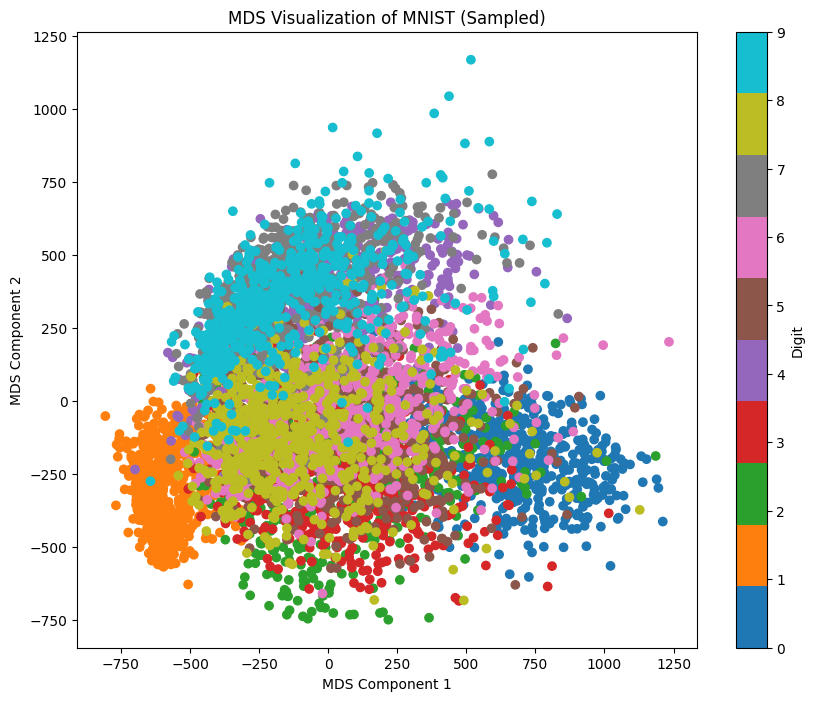

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=train_labels_sampled, cmap=plt.cm.get_cmap("tab10", 10))
plt.colorbar(label='Digit')
plt.title('MDS Visualization of MNIST (Sampled)')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.show()